# Baseline Models

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Read the CSV file
df = pd.read_csv('experiment_results.csv')
df.head()

,Model,Environment,Difficulty,Run,Moves,Score
0,mixtral-8x7b-32768,env_easy,1,1,5,1
1,mixtral-8x7b-32768,env_easy,1,2,5,1
2,mixtral-8x7b-32768,env_easy,1,3,6,1
3,mixtral-8x7b-32768,env_easy,1,4,6,1
4,mixtral-8x7b-32768,env_easy,1,5,6,1


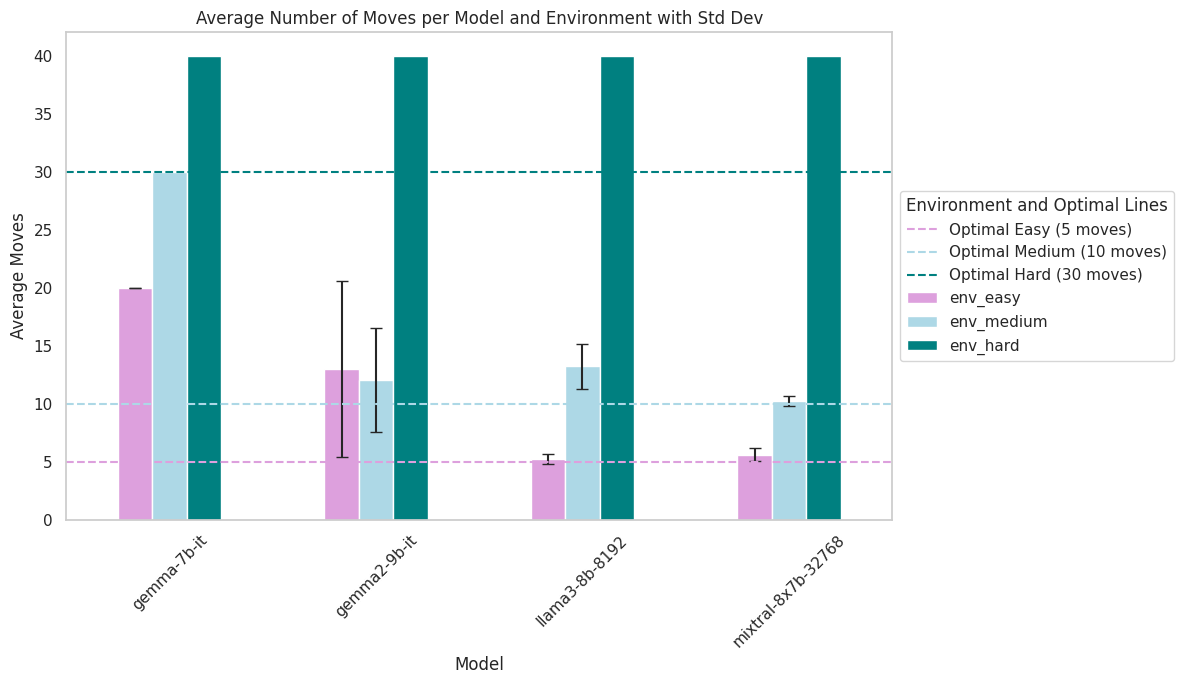

In [33]:
# Calculate mean and standard deviation
grouped = df.groupby(['Model', 'Environment'])['Moves']
avg_moves = grouped.mean().unstack()
std_moves = grouped.std().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
# New color scheme: Plum for easy, Light blue for medium, and Teal for hard
colors = ['#DDA0DD', '#ADD8E6', '#008080']
avg_moves = avg_moves[['env_easy', 'env_medium', 'env_hard']]  # Ensuring order of bars
avg_moves.plot(kind='bar', yerr=std_moves[['env_easy', 'env_medium', 'env_hard']], ax=ax, capsize=4, color=colors)

# Add horizontal lines for optimal quest lengths
optimal_easy = 5
optimal_medium = 10
optimal_hard = 30
plt.axhline(y=optimal_easy, color=colors[0], linestyle='--', label='Optimal Easy (5 moves)')
plt.axhline(y=optimal_medium, color=colors[1], linestyle='--', label='Optimal Medium (10 moves)')
plt.axhline(y=optimal_hard, color=colors[2], linestyle='--', label='Optimal Hard (30 moves)')

# Remove background grid
ax.grid(False)

# Move the legend outside of the plot on the right
ax.legend(title='Environment and Optimal Lines', loc='center left', bbox_to_anchor=(1, 0.5))

# Additional plot settings
plt.title('Average Number of Moves per Model and Environment with Std Dev')
plt.ylabel('Average Moves')
plt.xlabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('avg_moves.png', dpi=300)
plt.show()



/tmp/ipykernel_318535/1295908943.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adjusted_success_rate = success_rate.applymap(lambda x: -0.02 if x == 0 else x)


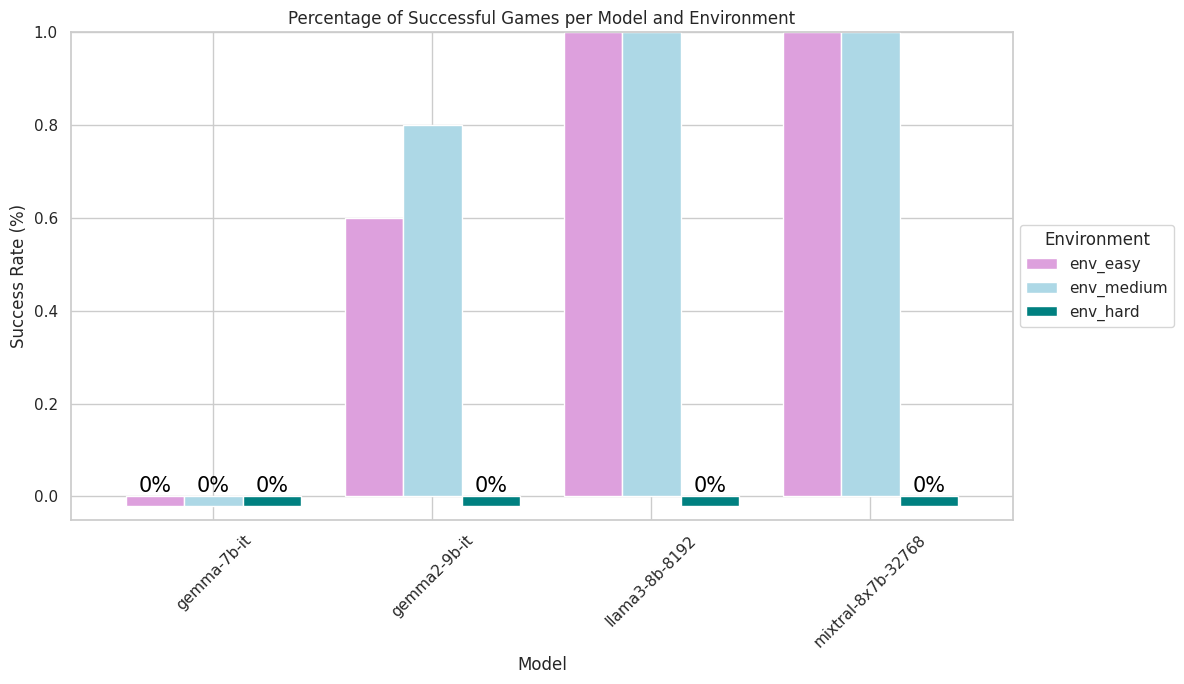

In [46]:
# Calculate the success rate
success_rate = df.groupby(['Model', 'Environment'])['Score'].mean().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
# Ensuring order of bars and applying the same color scheme
colors = ['#DDA0DD', '#ADD8E6', '#008080']
success_rate = success_rate[['env_easy', 'env_medium', 'env_hard']]  # Order of environments

# Adjusting zero values to be slightly negative for visibility (-0.02)
adjusted_success_rate = success_rate.applymap(lambda x: -0.02 if x == 0 else x)

# Plot bars
bars = adjusted_success_rate.plot(kind='bar', ax=ax, color=colors, width=0.8)

# Add labels on top of bars representing 0% success
for rect in bars.patches:
    height = rect.get_height() 
    # Check if the bar represents 0% success, adjust label accordingly
    if height == -0.02:
        ax.text(rect.get_x() + rect.get_width() / 2.0, height + .02, '0%', ha='center', va='bottom', color='black', fontsize=15)

# Add plot settings
plt.title('Percentage of Successful Games per Model and Environment')
plt.ylabel('Success Rate (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(-0.05, 1)  # Adjusting the y-axis to include slightly negative values

# Move the legend outside of the plot on the right
ax.legend(title='Environment', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
